# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import yfinance as yf

In [79]:
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
from eeff import eeff


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
%reload_ext eeff

# Read and Explore data

Here we import our data. We use and API to download data from Yahoo Finance. 
We import stock data (adj. close) from 20 US companies. The adj. close is plotted in an interactive plot to inspect the data.

In [81]:
eeff.downint()

[*********************100%***********************]  20 of 20 completed


Overall there seem to be a up-going trend in the stock prices. However - escpecially in 2020 - there seem to be some kind of dip. If you zoom in around Mar. 15. 2020 you can see, that all the stocks goes down in price around here due to COVID. 
Besides from that the plot serves more as a way to inspect that data looks nice and is ready to be analysed. 

# Analysis

We are intrested in calculating the Sharpe Ratio of an optimal portefolio with the 20 companies from above. First we compute the co-variance between all 20 companies and plot it in a colour coded 20x20 matrix:

[*********************100%***********************]  20 of 20 completed


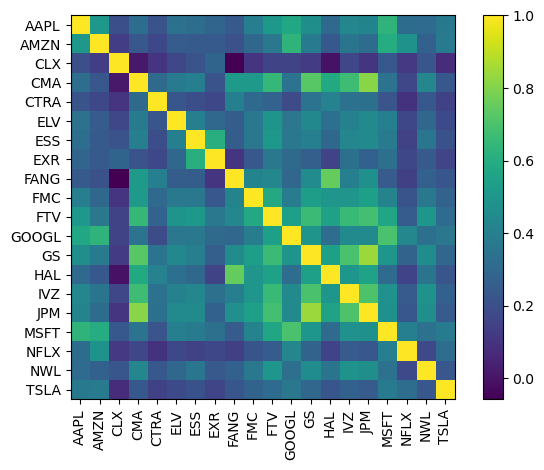

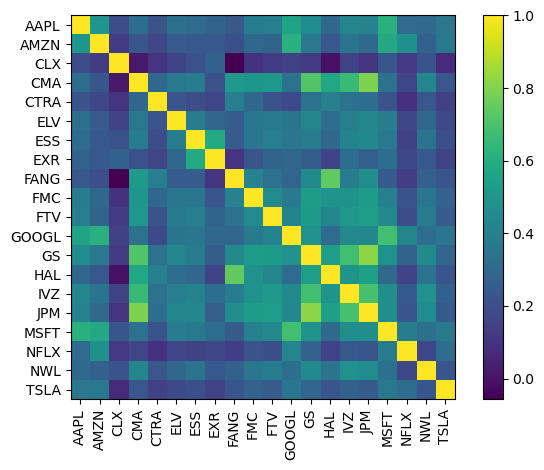

In [82]:
import pypfopt
pypfopt.__version__
#Covariance
from pypfopt import risk_models
from pypfopt import plotting
eeff.cov()

Now we calculate the expexted returns and plot them:

[*********************100%***********************]  20 of 20 completed


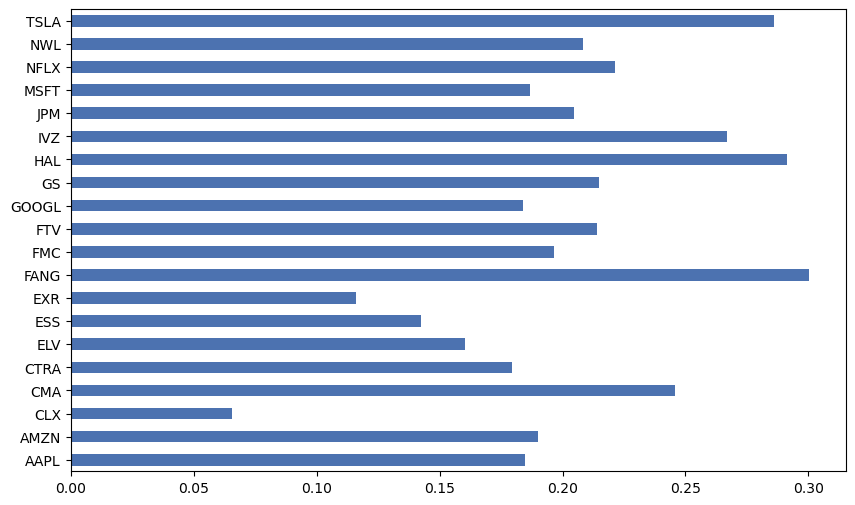

In [83]:
eeff.expected_returns()

The last thing we need to do now is to compute the efficient frontier of the portefolie. We do this and plot it together with the expected return and volatility of the 20 different companies:

[*********************100%***********************]  20 of 20 completed
Annual volatility: 14.5%
Expected annual return: 19.6%
Annual volatility: 17.9%
Sharpe Ratio: 0.98


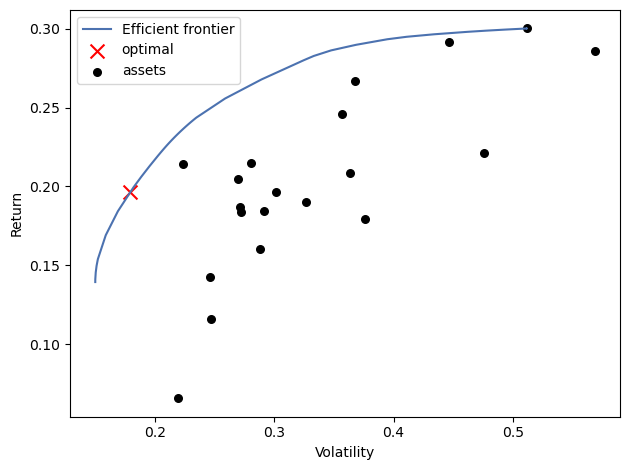

In [84]:
eeff.efficientfrontier()

[*********************100%***********************]  20 of 20 completed
Annual volatility: 14.5%
Expected annual return: 19.6%
Annual volatility: 17.9%
Sharpe Ratio: 0.98
Sample portfolio returns: [0.18593289 0.20757059 0.21894409 ... 0.20547685 0.22365354 0.21638375]
Sample portfolio volatilities: 0         0.194556
1         0.212656
2         0.227397
3         0.193371
4         0.211063
            ...   
999995    0.198540
999996    0.198055
999997    0.219659
999998    0.236139
999999    0.227400
Length: 1000000, dtype: float64


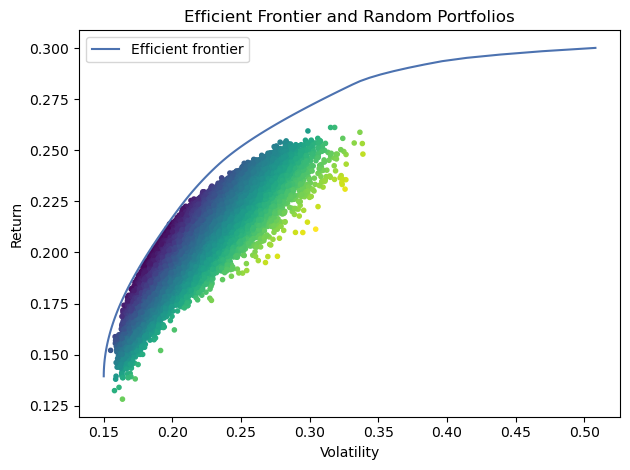

In [85]:
eeff.random_portefolios()

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.